In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/creditcard.csv


# 1. Initial Preprocessing  

In [2]:
#importing dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modules for model training and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
!pip install optuna
import optuna
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading Datasets
df = pd.read_csv("../input/fraud-detection/creditcard.csv")

In [4]:
df.sample(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155189,104748.0,1.960864,-0.325793,-0.062076,0.609282,-0.687701,-0.458010,-0.669933,-0.199865,2.373704,...,0.091486,0.786125,0.123349,0.03703,-0.255208,0.700152,-0.045489,-0.051186,24.00,0
265477,161902.0,-0.464565,-0.086839,1.366160,-0.274108,0.485827,-0.666155,0.975388,-0.999741,1.716517,...,-0.385767,0.021717,0.436603,-0.01366,-1.066230,-0.796849,-0.641220,-0.728961,9.99,0


In [5]:
#checking for null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

1081

In [7]:
#dropping duplicates
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:>

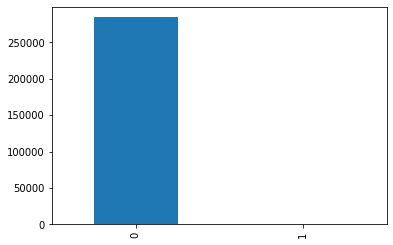

In [9]:
df["Class"].value_counts().plot(kind='bar')


In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Massive imbalance where 0 represents legit cases and 1 represents fraudelent transactions.
You can use **SMOTE()** to oversample and generate equal samples for fraudelent transactions which is a better option although i am going to to undersample legit transactions and save computational power because I am on a Potato. :) 

I will also seperate the data according to their class for further analysis

In [11]:
legit_df = df[df["Class"]== 0 ]
fraud_df = df[df["Class"]== 1]

legit_df.shape , fraud_df.shape

((284315, 31), (492, 31))

In [12]:
#some statistical analysis 
legit_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

- There were some null transactions and the highest transaction was more than 25k
- 75% of the transactions are below 77 


In [13]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

- The max amount lost in fraud was 2125 while interestingly there are some null transactions which are considered to be fraudelent.
- 75% of the transactions are below 105.

In [14]:
#compare features for both classes 
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Undersampling - Handling the Imbalance
Building a sample dataset from original so that both classes of legit and fraudelent transactions have similar samples.

Since we have 492 samples of fraud cases, I will randomly pick 492 legit samples and create a dataset with almost 1000 samples which is kinda decent.

In [15]:
legit_sample = legit_df.sample(492)

In [16]:
#concatenating both datasets
new_df = pd.concat([legit_sample,fraud_df], axis=0)
new_df.shape

(984, 31)

In [17]:
new_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

Looks pretty balanced to mee..

# 2. Splitting Dataset into Features and Label

In [18]:
x = new_df.drop("Class", axis = 1)
y = new_df["Class"]
x.shape , y.shape

((984, 30), (984,))

In [19]:
#splitting dataset into train and test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42,stratify=y)

In [20]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((639, 30), (639,), (345, 30), (345,))

In [21]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
154676,102542.0,-1.456876,3.740306,-7.404518,7.440964,-1.549878,-1.661697,-5.757213,1.615011,-2.194881,...,0.529557,0.957897,0.145339,-0.044704,-0.544962,-0.757757,-0.005352,0.318152,-0.323554,2.28
106998,70229.0,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.388885,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,3.79
80743,58633.0,1.160210,-0.497465,0.743233,0.091011,-0.768610,0.135666,-0.535254,0.043921,1.125161,...,0.122046,-0.244323,-0.526653,-0.084274,-0.342029,0.256599,0.985171,-0.040022,0.017770,65.97
43773,41646.0,-3.240187,2.978122,-4.162314,3.869124,-3.645256,-0.126271,-4.744730,-0.065331,-2.168366,...,-0.224043,2.601441,0.231910,-0.036490,0.042640,-0.438330,-0.125821,0.421300,0.003146,172.32
159565,112648.0,-0.335693,1.046446,-1.117622,-1.188177,1.314396,-1.284245,1.648186,-0.361401,-0.091884,...,0.059502,0.190624,0.742413,-0.180778,0.605775,-0.226153,0.072344,0.491201,0.352420,31.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30496,35953.0,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,0.284555,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70
74496,55614.0,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,...,0.073164,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83
15566,26961.0,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99
156297,107787.0,-0.533496,0.439824,1.549830,-0.012768,0.214217,0.009176,-0.185042,0.198860,1.707998,...,-0.178900,-0.166849,-0.317289,-0.086310,-0.621159,-0.588714,-0.793102,0.053192,0.164749,2.12


# 3. Feature Selection
Selecting the most important features for the model. Actual feature selection can be even lengthy involving different f-tests like ANOVA and Mutual Information FS and they keep varying every time so its better to take an average of all the scores and then decide. 

To keep it simple, I am just going to use the mutual information test once which is calculated between two variables and measures the reduction of uncertainty of one variable given the value of the other variable. In short, tells us dependance of the features with our label. <br>
For eg: If I know its Bright and Sunny, the uncertainty of a snowfall would be very low. 

Feature 0: 0.135081
Feature 1: 0.175977
Feature 2: 0.263100
Feature 3: 0.313784
Feature 4: 0.359072
Feature 5: 0.142589
Feature 6: 0.175168
Feature 7: 0.294436
Feature 8: 0.138044
Feature 9: 0.229092
Feature 10: 0.424859
Feature 11: 0.375469
Feature 12: 0.390008
Feature 13: 0.035973
Feature 14: 0.458727
Feature 15: 0.000000
Feature 16: 0.359222
Feature 17: 0.456700
Feature 18: 0.225569
Feature 19: 0.124256
Feature 20: 0.122566
Feature 21: 0.228860
Feature 22: 0.018068
Feature 23: 0.068396
Feature 24: 0.046721
Feature 25: 0.023200
Feature 26: 0.032228
Feature 27: 0.202298
Feature 28: 0.146820
Feature 29: 0.144149


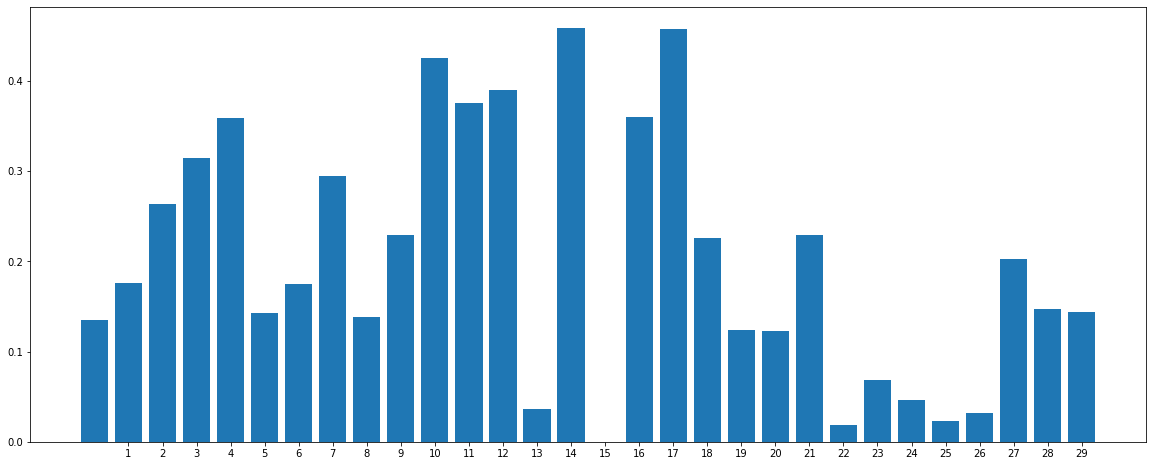

In [22]:
mutual_info = mutual_info_classif(x_train, y_train, n_neighbors=5, copy = True)
for i in range(len(mutual_info)):
    print('Feature %d: %f' % (i, mutual_info[i]))
# plot the scores
plt.subplots(figsize=(20, 8))
plt.bar([i for i in range(len(mutual_info))], mutual_info)
x = np.arange(1,30 ,1)
plt.xticks(x)
plt.show()

I am going to consider 0.1 as my threshold. Therefore features 13 , 15 , 22-26 are excluded for my dataset. <br>
Note: Again this is a very simple way of doing feature selection. Intense feature selection can take a week sometimes.

In [23]:
new_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
#defining the new feature set
x_fs = new_df.drop(['V13','V15','V22','V23','V24','V25','V26'],axis=1)
x_fs.shape

(984, 24)

In [25]:
#splitting dataset into train and test splits
x_fs_train,x_fs_test,y_train,y_test = train_test_split(x_fs,y,test_size=0.35,random_state=42,stratify=y)

In [26]:
#normalizing time and amount features
scaler = StandardScaler()
x_fs_train_std=scaler.fit_transform(x_fs_train[['Time','Amount']])
x_fs_test_std=scaler.transform(x_fs_test[['Time','Amount']])

# 4. Model Training 
After we choose the best Algorithm for our dataset, we cross validate by adjusting the hyperparameters on this algorithm using Grid Search Cross Validation.

In [27]:
#dictionary to define the classifiers 
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

#training all the models in the dictionary through cross_validate
results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, x_fs_train_std, y_train, cv=10,
        scoring= (['accuracy','f1'])
    )
    #appending results in the result dataframe
    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
        
results = results.sort_values("Avg_F1_Score", ascending=False)
results

,Classifier,Avg_Accuracy,Avg_F1_Score
3,RF,0.735392,0.730681
2,DT,0.718328,0.724253
7,LGBM,0.722966,0.722180
6,XGB,0.715154,0.712868
0,KNN,0.676017,0.675537
4,SVM,0.585193,0.642137
5,MLP,0.574256,0.626098
1,LR,0.511657,0.529913


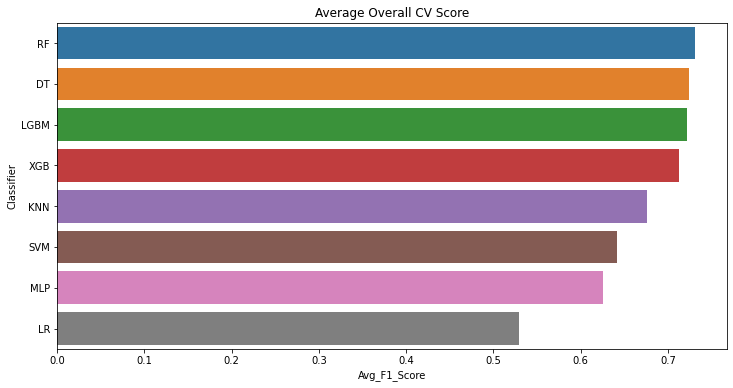

In [28]:
#Lets visualize the results 
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="Avg_F1_Score", y="Classifier")
plt.title("Average Overall CV Score")
plt.show()

I am going to pick the LGBM classifier as it has given me the highest F1_Score. As I have already balanced the dataset, F1 score is a good metric in this case. 

## 4.1 Hyperparameter Tuning
Using Optuna to find the best parameters. Most of the LGBM paraemeters overlap and trying to manually find the most efficient parameters can be a big mistake causing overfitting. 
Therefore we rely on a hyperparameter tuning framework such as Optuna

In [29]:
#Defining the objective function for optuna
def objective(trial, x, y):
    # the parameters grid
    param_grid = { 
        "n_estimators": trial.suggest_int('n_estimators', 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        'min_child_weight': trial.suggest_loguniform('min_child_weight',1e-10, 1e10),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        }  
    model = LGBMClassifier(objective="binary", **param_grid)
    cv_results = cross_validate(
        model, x, y_train, cv=10,
        scoring= (['accuracy','f1'])
    )
    return cv_results['test_f1'].mean()

In [30]:
#creating an optuna study 
optuna.logging.set_verbosity(optuna.logging.WARNING) #suppresses the verbose
study = optuna.create_study(direction='maximize', study_name='LGBM Classifier')
func = lambda trial: objective(trial,x_fs_train_std,y_train)
study.optimize(func, n_trials=50,)


[LightGBM] [Warning] min_gain_to_split is set=10.529684034734204, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.529684034734204
[LightGBM] [Warning] min_gain_to_split is set=10.529684034734204, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.529684034734204
[LightGBM] [Warning] min_gain_to_split is set=10.529684034734204, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.529684034734204
[LightGBM] [Warning] min_gain_to_split is set=10.529684034734204, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.529684034734204
[LightGBM] [Warning] min_gain_to_split is set=10.529684034734204, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.529684034734204
[LightGBM] [Warning] min_gain_to_split is set=10.529684034734204, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.529684034734204
[LightGBM] [Warning] min_gain_to_split is set=10.529684034734204, min_split_

In [31]:
print(f"Best F1-Score {study.best_value:.5f}: ")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

Best F1-Score 0.74529: 
	Best params:
		n_estimators: 694
		learning_rate: 0.24805900251575413
		num_leaves: 2980
		max_depth: 7
		min_child_weight: 0.007016016953217889
		min_gain_to_split: 0.0010114743235722923


In [32]:
hyper_params ={ 'learning_rate': 0.28403198677831654,
 'n_estimators': 792,
 'max_depth': 9,
 'num_leaves': 1720,
 'min_child_weight': 0.0009304244489503809,
 'min_gain_to_split': 1.683313711783354
              }
lgbm_clf_tuned = LGBMClassifier(**hyper_params)
lgbm_clf_tuned.fit(x_fs_train_std, y_train)

[LightGBM] [Warning] min_gain_to_split is set=1.683313711783354, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.683313711783354


LGBMClassifier(learning_rate=0.28403198677831654, max_depth=9,
               min_child_weight=0.0009304244489503809,
               min_gain_to_split=1.683313711783354, n_estimators=792,
               num_leaves=1720)

Test Accuracy: 0.7565217391304347
Test F1-Score: 0.7423312883435583


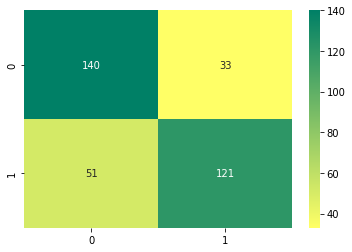

In [33]:
y_pred = lgbm_clf_tuned.predict(x_fs_test_std)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Test F1-Score: {f1_score(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       173
           1       0.79      0.70      0.74       172

    accuracy                           0.76       345
   macro avg       0.76      0.76      0.76       345
weighted avg       0.76      0.76      0.76       345

